# INT-353 CA 2 #
**By-**<br>
*Name:* *R Sahil Sharma*<br>
*Registration Number:* *12015815*<br>
*Roll Number:* *RK20CHA01*<br>

In [125]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as ph
import altair as alt
# alt.renderers.enable('notebook')
%matplotlib inline

In [126]:
# Reading thedataset
dfset_Path = "./Olympics/athlete_events.csv"
df = pd.read_csv(dfset_Path)

### 1. Data Cleaning ###

In [127]:
#Now taking Some information about the data
df.info()
#It seems that there are some missingdata in Age,Height,Weight,Medal we need to feel it

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [128]:
#Now taking Some information about the data
df.info()
#It seems that there are some missing data in Age,Height,Weight,Medal we need to feel it

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [129]:
#We can see there are lot of NULL value in some of the feature..Lets try to fill it
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


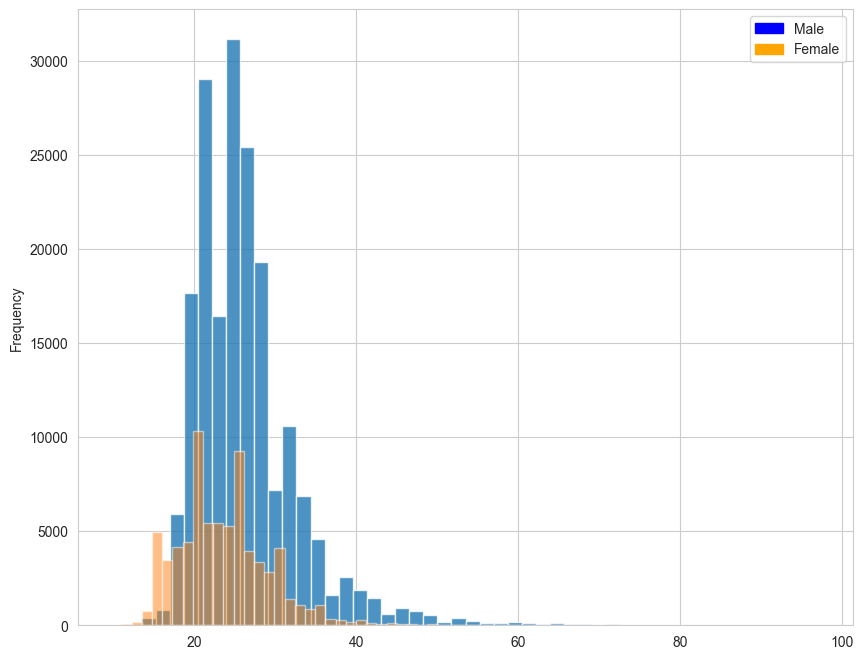

In [130]:


#Now trying to Analyize Age column ;-)
sns.set_style('whitegrid')
plt.figure(figsize=(10,8))
df[df['Sex']=='M']['Age'].plot(kind='hist',alpha=.8,bins=50)
df[df['Sex']=='F']['Age'].plot(kind='hist',alpha=.5,bins=50)
lg1 = ph.Patch(label='Male',color='blue')
lg2 = ph.Patch(label='Female',color='orange')
plt.legend(handles=[lg1,lg2])

Here we can see that there in the olympics there have been participants whose ages lie in the extremes. This is because there are few events in olympics where experience matters much more than your physical strength, an expamle of this can be sports related to horses such as ,So to fill NULL values in age column we will fill male and female age with the mode of age values of both the genders

In [131]:
# Filling null values of the age column
# agemode for females
FemaleAgeMode = df[df['Sex']=='F']['Age'].mode()
MaleAgeMode = df[df['Sex']=='M']['Age'].mode()
print(FemaleAgeMode)
print(MaleAgeMode)

# filling Male and female age null values with the mode values of age for each gender
def age_check(value):
    age = value[0]
    sex = value[1]
    if sex=='M'and pd.isnull(age):
        age=MaleAgeMode
    if sex=='F'and pd.isnull(age):
        age=FemaleAgeMode
    return age
df['Age'] = df[['Age','Sex']].apply(age_check,axis=1)

0    21.0
Name: Age, dtype: float64
0    24.0
Name: Age, dtype: float64


In [132]:
#Just a Check
df.isnull().sum()

ID             0
Name           0
Sex            0
Age            0
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

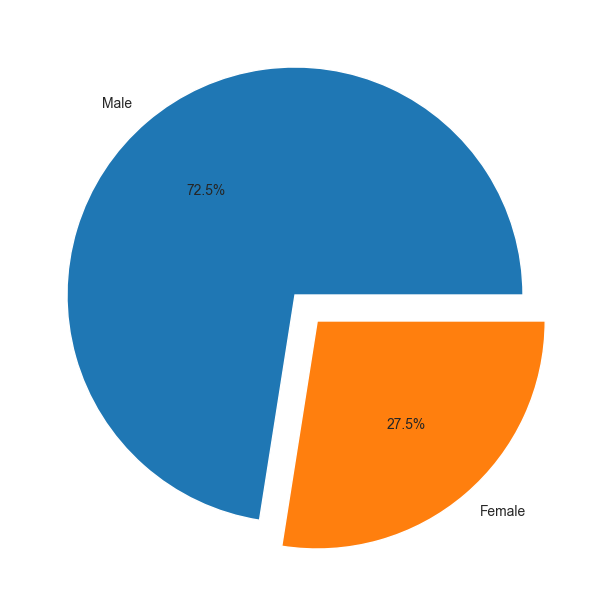

In [133]:
#Now lets us see what is the percentage of male and female in olympics
plt.figure(figsize=(6,6))
#lg1 = ph.Patch(color='blue',label='Male')
#lg2 = ph.Patch(color='orange',label='Female')                              ##Static code without plotly for pie chart
#plt.legend(handles=[lg1,lg2],loc=1)
plt.pie(x=df['Sex'].value_counts(),autopct='%1.1f%%',explode=(0,0.15),labels=['Male','Female'])
plt.tight_layout()

Hmmm..Number of male are lot grater than no fo female..

In [134]:
#Now finding the median of Weight and height on the basis of country and trying to fill the NULL values of Weight and Height on basis of country
Weight = df.groupby('NOC')['Weight'].median()
Height = df.groupby('NOC')['Height'].median()

In [135]:
#function to fill in NULL values of Height feature
def Height_check(value):
    height = value[0]
    noc = value[1]
    if pd.isnull(Height.loc[noc]):
        height = df['Height'].median()
    if pd.isnull(height):
        height = Height.loc[noc]
    return height

df['Height'] = df[['Height','NOC']].apply(Height_check,axis=1)

In [136]:
#Function to fill the NULL values of Weight feature
def Weight_check(value):
    weight = value[0]
    noc = value[1]
    if pd.isnull(Weight.loc[noc]):
        weight = df['Weight'].median()
    if pd.isnull(weight):
        weight = Weight.loc[noc]
    return weight

df['Weight'] = df[['Weight','NOC']].apply(Weight_check,axis=1)

In [137]:
#Just a check..
df.isnull().sum()

ID             0
Name           0
Sex            0
Age            0
Height         0
Weight         0
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64


The Medal column has NaN values if no medal is won , we Substitute the NaN values with a string 'None'

In [138]:
df['Medal'] = df['Medal'].fillna('None')
df['Medal'].isna().sum()

0


After Removing the NaN values

In [139]:
df.isna().sum()

ID        0
Name      0
Sex       0
Age       0
Height    0
Weight    0
Team      0
NOC       0
Games     0
Year      0
Season    0
City      0
Sport     0
Event     0
Medal     0
dtype: int64

### 2. Univariate and Bivariate analysis with graphs and explanations ###

### Univariate Analysis ###

Participation Analysis<br>
Graphical representation of the number of participants in the olympics over the years:

<AxesSubplot: xlabel='Year'>

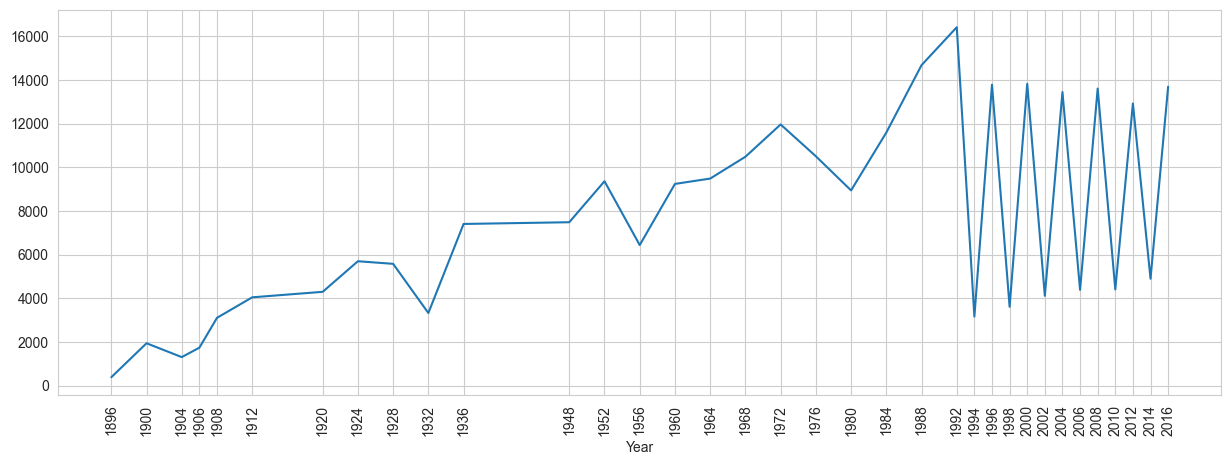

In [142]:
# plotting the number of participants in each olympic games
# x values are the years of the olympics
participants = df.groupby('Year')['Name'].count()
plt.figure(figsize=(15, 5))
plt.xticks(df['Year'].unique())
plt.xticks(rotation=90)
sns.lineplot(x=participants.index, y=participants.values,)

Inferences from the above graphs:
<ul>
    <li>Olympics were not conducted in 1916, 1940 and 1944 due to <strong><em>World War I (1914-18)</em></strong> and <strong><em>World War II (1939-45)</em></strong></li>
    <li>After 1992 there is a lot of fluctuation in the plot. This is because till 1992 Summer and Winter Olympics were conducted in the same year which was not the case after 1992</li>
    <li>There are slight dips in the number of participants through the years during certain olympiads the reason for which is exclusion of and boycott by nations from the Games due to Geo-Political reasons</li>
</ul>

Plotting Gender wise participation in the olympics over the years:

In [144]:
# Grouping particpants by gender year wise and pltting them
gender = df.groupby(['Year', 'Sex'])['Name'].count().unstack()
gender.head()

Sex,F,M
Year,,
1896,NaN,380.0
1900,33.0,1903.0
1904,16.0,1285.0
1906,11.0,1722.0
1908,47.0,3054.0


<AxesSubplot: xlabel='Year', ylabel='M'>

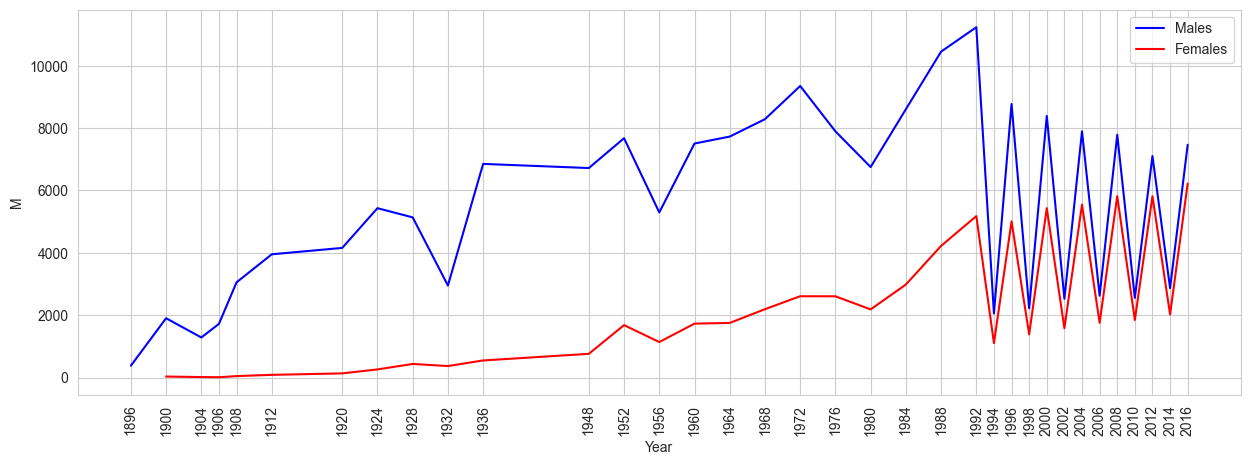

In [145]:
# Plotting the number of male and female participants over the years
plt.figure(figsize=(15, 5))
plt.xticks(df['Year'].unique())
plt.xticks(rotation=90)
sns.lineplot(x=gender.index, y=gender['M'], color='blue', label='Males')
sns.lineplot(x=gender.index, y=gender['F'], color='red', label='Females')

Inferences from the above graph:
<ul>
    <li>There is a huge difference in the number of male vs female participants in the olympics</li>
    <li>There is a huge dip in the number of particpants in the olympics after 1992. The reason for this is that summer and olympic games are held during different years whereas till 1992 the summer and olympic games were held during same year.</li>
    <li>Females were not allowed to participate in the inagural Modern Olympic Games of Athens in 1896</li>
</ul>

Summer Vs Winter Olympics Participants:

In [146]:
weather = df.groupby(['Season', 'Year'])['Name'].count().unstack()
weather.head()

Year,1896,1900,1904,1906,1908,1912,1920,1924,1928,1932,...,1998,2000,2002,2004,2006,2008,2010,2012,2014,2016
Season,,,,,,,,,,,,,,,,,,,,,
Summer,380.0,1936.0,1301.0,1733.0,3101.0,4040.0,4292.0,5233.0,4992.0,2969.0,...,NaN,13821.0,NaN,13443.0,NaN,13602.0,NaN,12920.0,NaN,13688.0
Winter,NaN,NaN,NaN,NaN,NaN,NaN,NaN,460.0,582.0,352.0,...,3605.0,NaN,4109.0,NaN,4382.0,NaN,4402.0,NaN,4891.0,NaN


In [147]:
# transposing the dataframe to make it easier to plot
weather = weather.T
weather.head()

Season,Summer,Winter
Year,,
1896,380.0,NaN
1900,1936.0,NaN
1904,1301.0,NaN
1906,1733.0,NaN
1908,3101.0,NaN


<AxesSubplot: xlabel='Year', ylabel='Summer'>

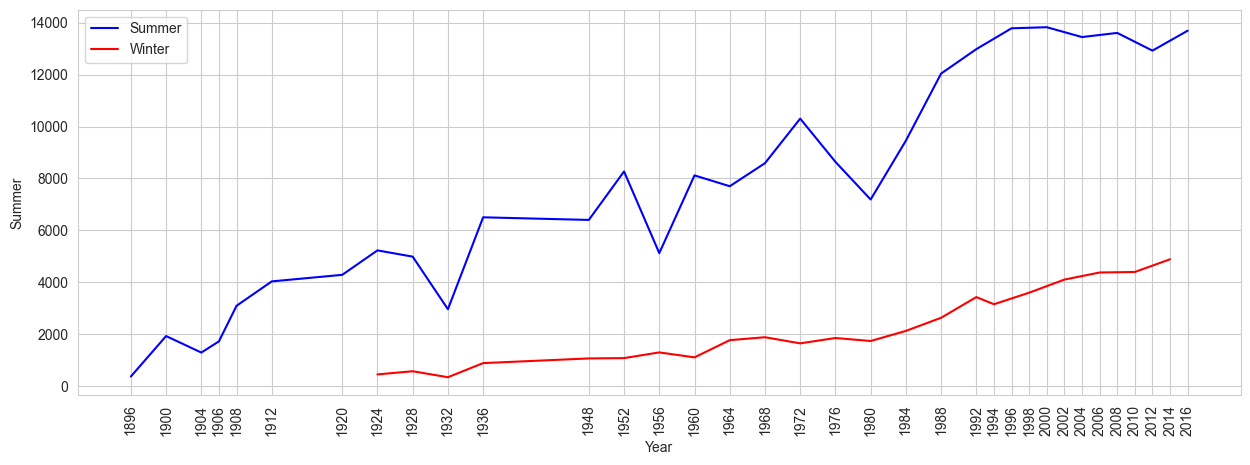

In [148]:
# plotting the number of participants in each olympic games season wise
plt.figure(figsize=(15, 5))
plt.xticks(df['Year'].unique())
plt.xticks(rotation=90)
sns.lineplot(x=weather.index, y=weather['Summer'], color='blue', label='Summer')
sns.lineplot(x=weather.index, y=weather['Winter'], color='red', label='Winter')

Summer Vs Winter Olympics number of particpating countries

In [149]:
# creating a new dataframe with the number of participating countries in each olympic games separated by season
countries = df.groupby(['Season', 'Year'])['NOC'].nunique().unstack()
# Transposing the dataframe to make it easier to plot
countries = countries.T
countries.head()

Season,Summer,Winter
Year,,
1896,12.0,NaN
1900,31.0,NaN
1904,15.0,NaN
1906,21.0,NaN
1908,22.0,NaN


<AxesSubplot: xlabel='Year', ylabel='Summer'>

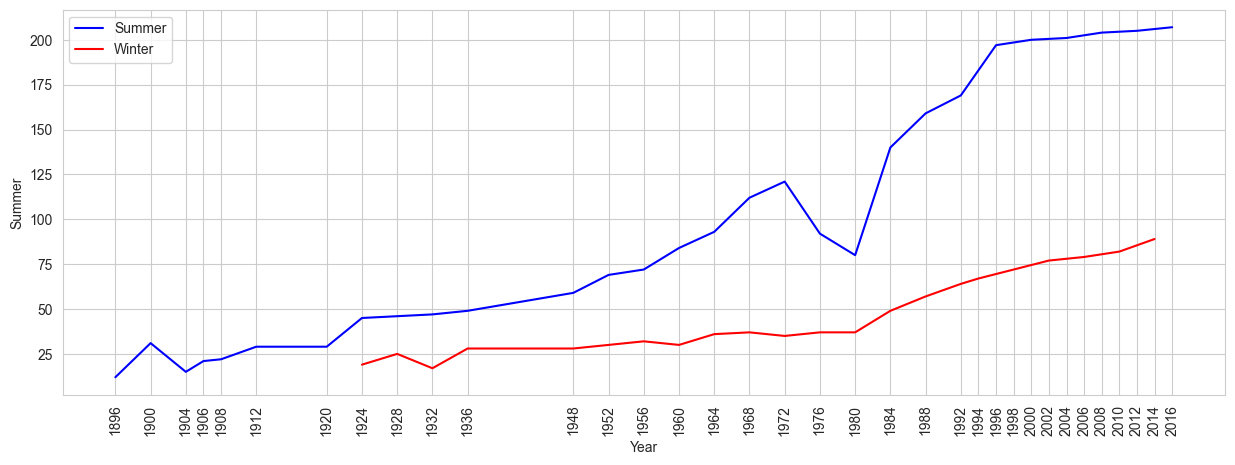

In [150]:
# plotting the number of participating countries in each olympic games season wise
plt.figure(figsize=(15, 5))
plt.xticks(df['Year'].unique())
plt.xticks(rotation=90)
sns.lineplot(x=countries.index, y=countries['Summer'], color='blue', label='Summer')
sns.lineplot(x=countries.index, y=countries['Winter'], color='red', label='Winter')

## Participants Physical Characteristics Analysis ##

Age Distribution of the participants in the olympics:

C:\Users\rsahi\AppData\Local\Temp\ipykernel_21780\4164622011.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'], color='blue')


<AxesSubplot: title={'center': 'Distribution of ages of players for summer olympics'}, xlabel='Age', ylabel='Density'>

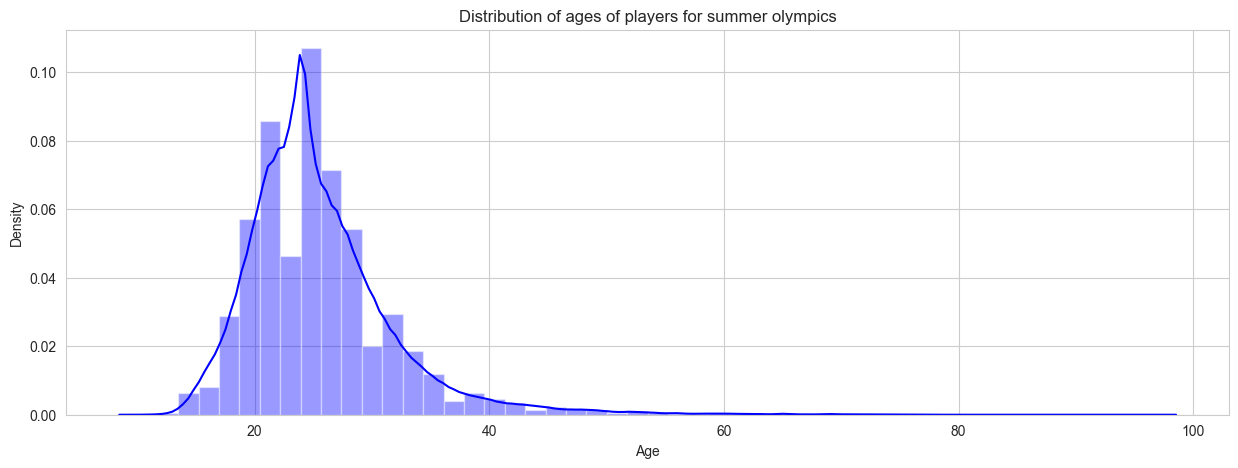

In [151]:
# plotting distrubtion plot of ages of players for summer olympics
plt.figure(figsize=(15, 5))
plt.title('Distribution of ages of players for summer olympics')
sns.distplot(df['Age'], color='blue')

<strong>Inferences:</strong><br>
Most of the players who participated in the olympics in the range of 20 to 40 years but there are few players who participated in the olympics at the age of 60 years and also those who participate at the age of 10 years. This is because in few sports like horse riding experience matters more than physical strength thus most of the participarts are old in those cases while sports like gymnastics and shooting require physical strength thus most of the participants are young in those cases.

Gender Distribution of the participants in the olympics:

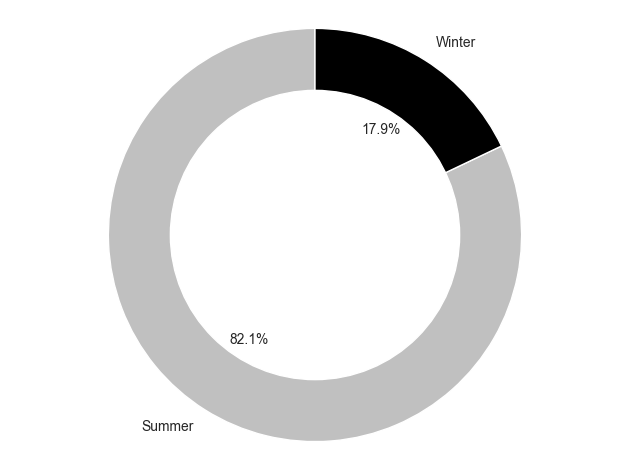

In [152]:
# Summer vs Winter Participants visualisation
fig1, ax1 = plt.subplots()

colors = ['silver','black']

ax1.pie(df.Season.value_counts(), colors = colors, labels=df.Season.value_counts().index, autopct='%1.1f%%', startangle=90)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax1.axis('equal')  
plt.tight_layout()
plt.show()

There are few reasons for less number of participants in the winter olympics viz.
<ul>
    <li>The inaugral winter olympics were held in 1924 while the summer olympics had taken place by that time for 7 times</li>
    <li>The Winter Olympics takes place for less number of days and has less events as compared to the Summer Olympics</li>
    <li>A lot of countries around the world experience none to very less snowfall which is the reason there are very few participants from a lot of countries in the winter games as compared to the summer games</li>
</ul>

### Bivariate Analysis ###

Will start by plotting the correlation matrix

C:\Users\rsahi\AppData\Local\Temp\ipykernel_21780\720656371.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap='YlGnBu');


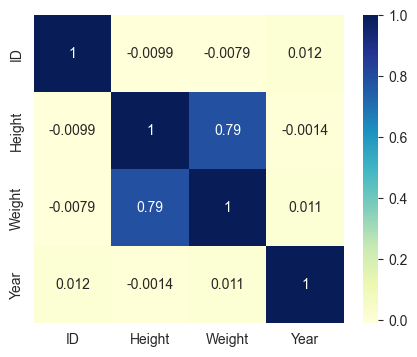

In [153]:
plt.figure(figsize=[5,4])
sns.heatmap(df.corr(),annot=True,cmap='YlGnBu');

W_H_Ratio and Height relation:

In [154]:
df['W_H_Ratio'] = df.Weight / df.Height

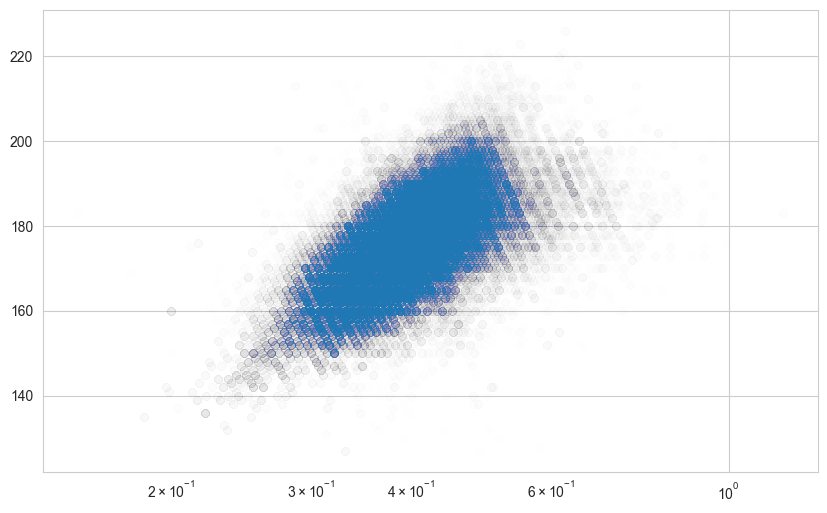

In [155]:
# weights and heights
plt.figure(figsize=(10,6))
plt.scatter(data = df, x='W_H_Ratio', y='Height', alpha=0.005)
plt.xscale('log')
plt.xlabel='Weight/Height Ratio' 
plt.ylabel='Frequency';

The relation between Weight and log-scaled Height looks positive and linear.

#### Does weight to height ratio differ between genders? ####

In [156]:
df.W_H_Ratio.mean(), df.query('Sex == "M"').W_H_Ratio.mean(), df.query('Sex == "F"').W_H_Ratio.mean()

(0.40057349260835406, 0.41565575966321605, 0.3607854674696894)

c:\Users\rsahi\miniconda3\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
c:\Users\rsahi\miniconda3\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


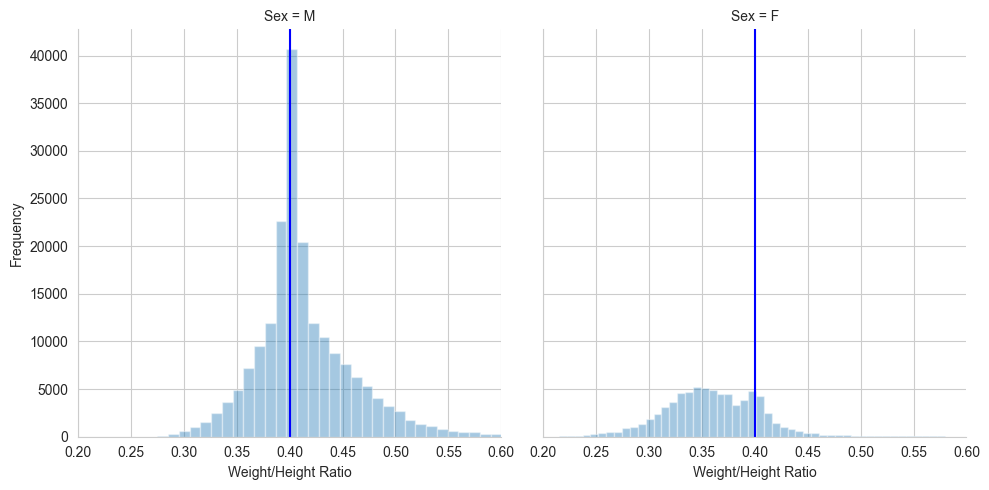

In [157]:
g = sns.FacetGrid(data = df, col = 'Sex', height=5)
g.map(sns.distplot, 'W_H_Ratio', kde=False, bins= 100)
g.map(plt.axvline, x=0.4, c='b')
g.set(xlim = (0.2, 0.6), xlabel='Weight/Height Ratio', ylabel='Frequency')
plt.tight_layout()

#g.map(plt.grid)

From the plot, It is obvious that male athletes have bigger weight (kg) per height (cm) than female athletes.

## 3. Statistical analysis of the numerical columns ##

Let's impute the Medal column by replacing NaNs with "None" string, and then necessary columns to category type:

In [158]:
df['Sport'] = df['Sport'].astype('category')
df['Sex'] = df['Sex'].astype('category')
df['Team'] = df['Team'].astype('category')
df['NOC'] = df['NOC'].astype('category')
df['Season'] = df['Season'].astype('category')
df['Sport'] = df['Sport'].astype('category')
df['Event'] = df['Event'].astype('category')
df['Medal'].fillna('None', inplace=True)
df['Medal'] = df['Medal'].astype('category')


Global analysis

In this section, only integrated observables are considered. This is the first step to understanding the dataset. Let's plot the numeric variables: Age, Mass, Height and Year. One would expect that the Age, Weight and Height would look like Gaussians and the number of participants would increase with time:


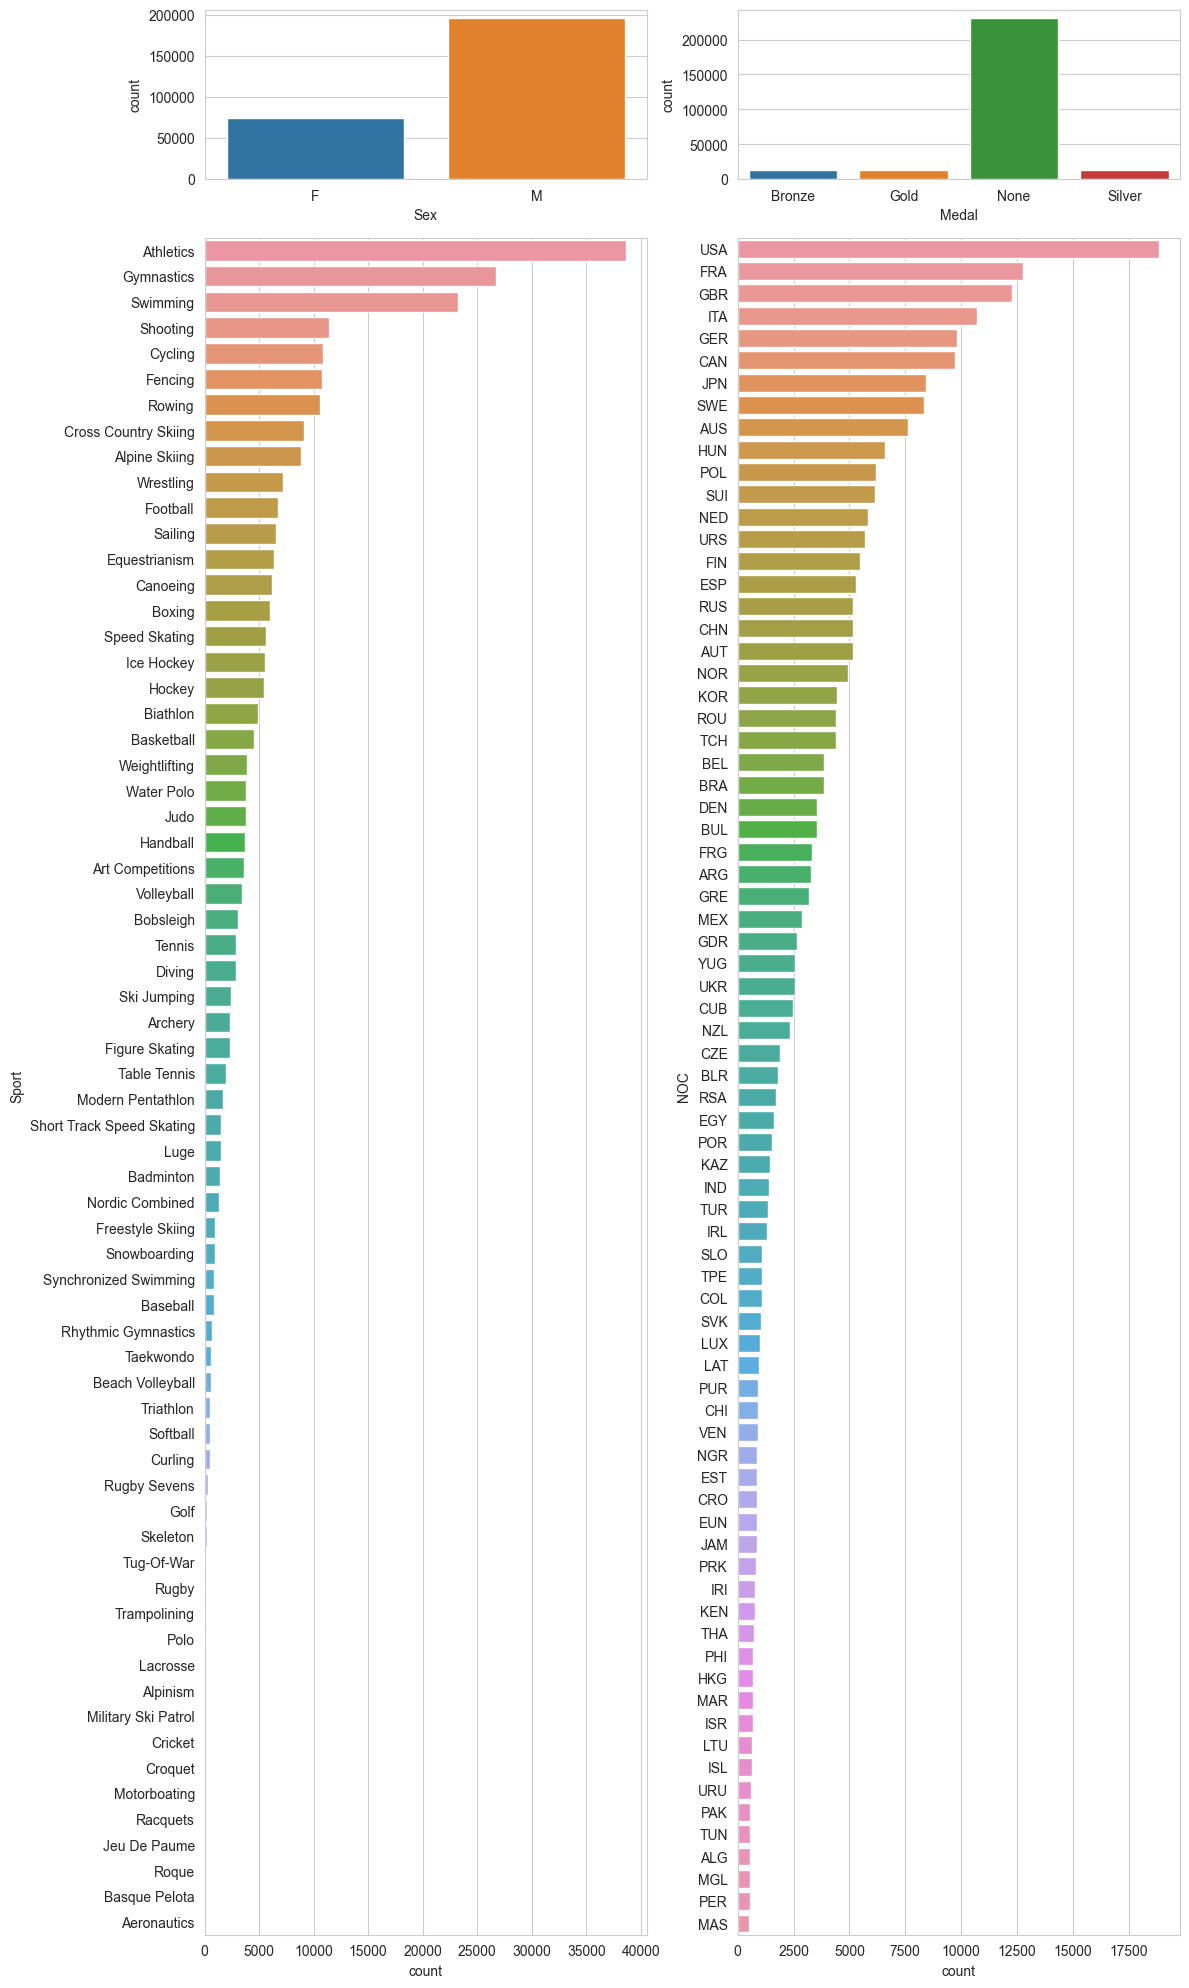

In [159]:
fig, axs = plt.subplots(2,2, figsize=(12,20), gridspec_kw={'height_ratios': [0.5, 5]})
axs = axs.flatten()
sns.countplot(x='Sex', data=df, ax=axs[0])
sns.countplot(x='Medal', data=df, ax=axs[1])
sns.countplot(y='Sport', data=df,  order = df['Sport'].value_counts().index, ax=axs[2])
noc_df = df[df['NOC'].isin(df.groupby('NOC').count().query('Name > 500').index)]
sns.countplot(y='NOC', data=noc_df, 
              order = noc_df['NOC'].astype('object').value_counts().index, ax=axs[3])
fig.tight_layout()


More detailed analysis

Let's look at the dataset in detail. It is important to understand possible correlations between the columns. One of the best ways is to plot the scatter plots for each of the numeric columns and optionally separate the dataset by bool parameter:


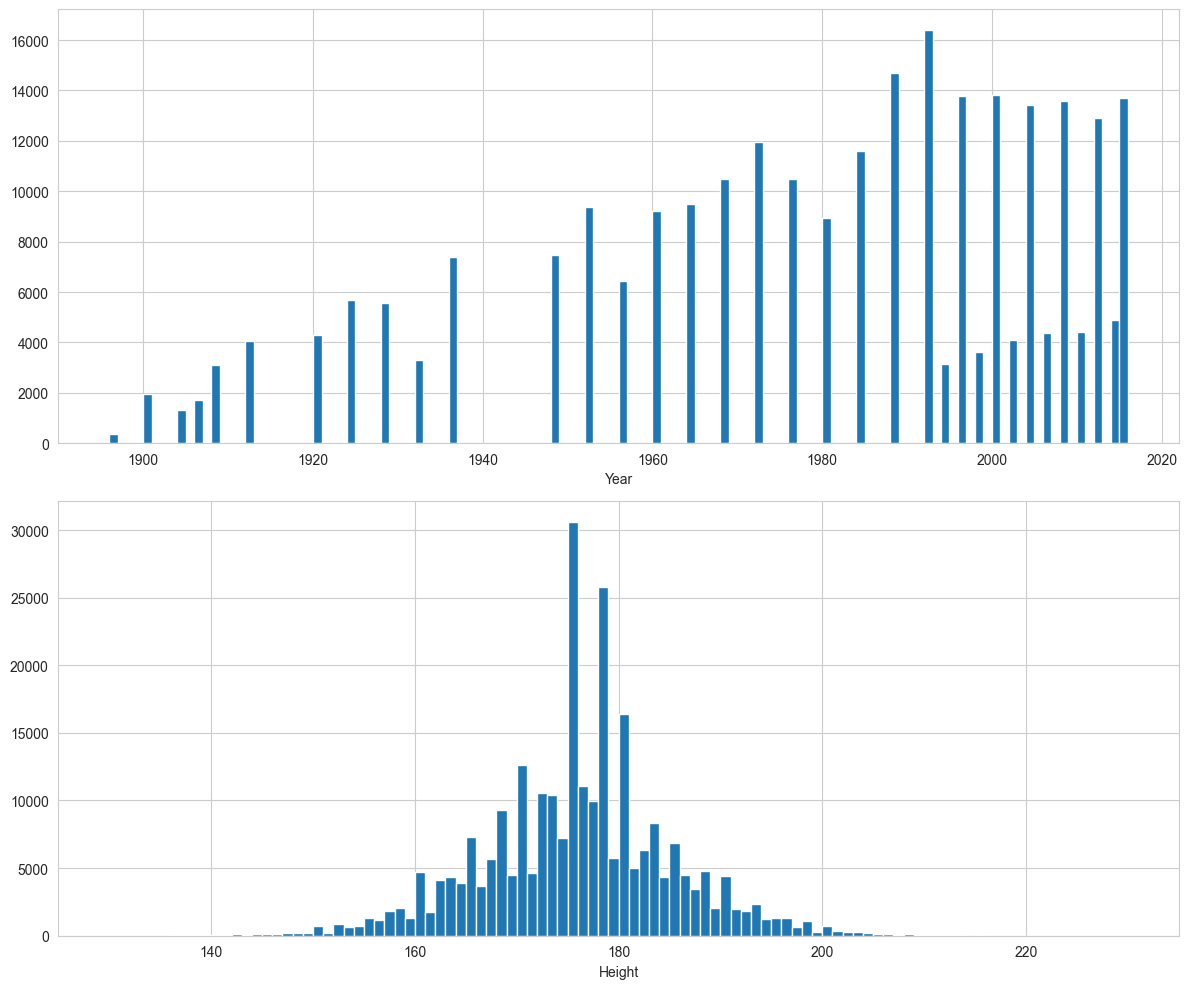

In [160]:
fig, axs = plt.subplots(2, figsize=(12,10))
axs = axs.flatten()
#axs[0].hist2d(y=df['Height'], x=df['Year'])
axs[0].hist(df.query('Year > 0')['Year'],bins=120)
axs[1].hist(df.query('Height > 0')['Height'],bins=100,range=(130,230))
axs[0].set_xlabel('Year')
axs[1].set_xlabel('Height')
fig.tight_layout()



Conclusions are :

    There are two gaps in Year histogram, which correspond to the two World Wars;
    There is a substructure in the 1990-ies, which will be studied below;
        This substructure takes away some of the participants;
    The histograms of Height and Weight have underlying substructure, which looks like degeneration;
        An athlete can participate in Olympics multiple times, therefore Height values will be repeated several times;
        However, the spikes in the Height distribution are ~5k high, which needs to be reviewed with care;
        Certain sports have weight requirements, which might deviate the Weight distribution from a Gaussian

A zoom into the recent years and separation by seasons tell us that the 2 year gap between the Winter and Summer Olympics started in 1994:

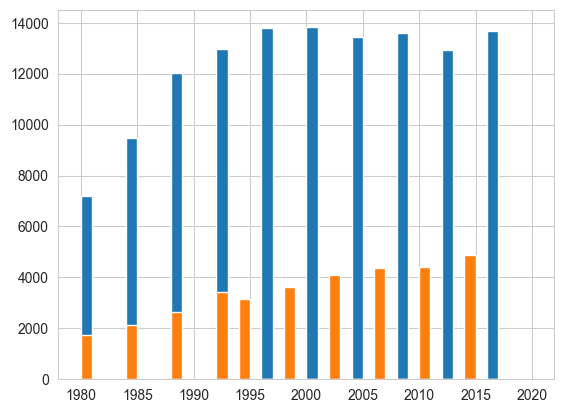

In [161]:


h1 = df.query('Season == "Summer"')['Year'].hist(bins = 40, range=(1980, 2020))
h2 = df.query('Season == "Winter"')['Year'].hist(bins = 40, range=(1980, 2020))



The plot above shows a statistically significant dip in the number of participants in 1980 for Summer Olympics. That year Olympics were feld in Moscow, which is connected to a global political crisis.

Let's find out which sports are more popular among man or women:

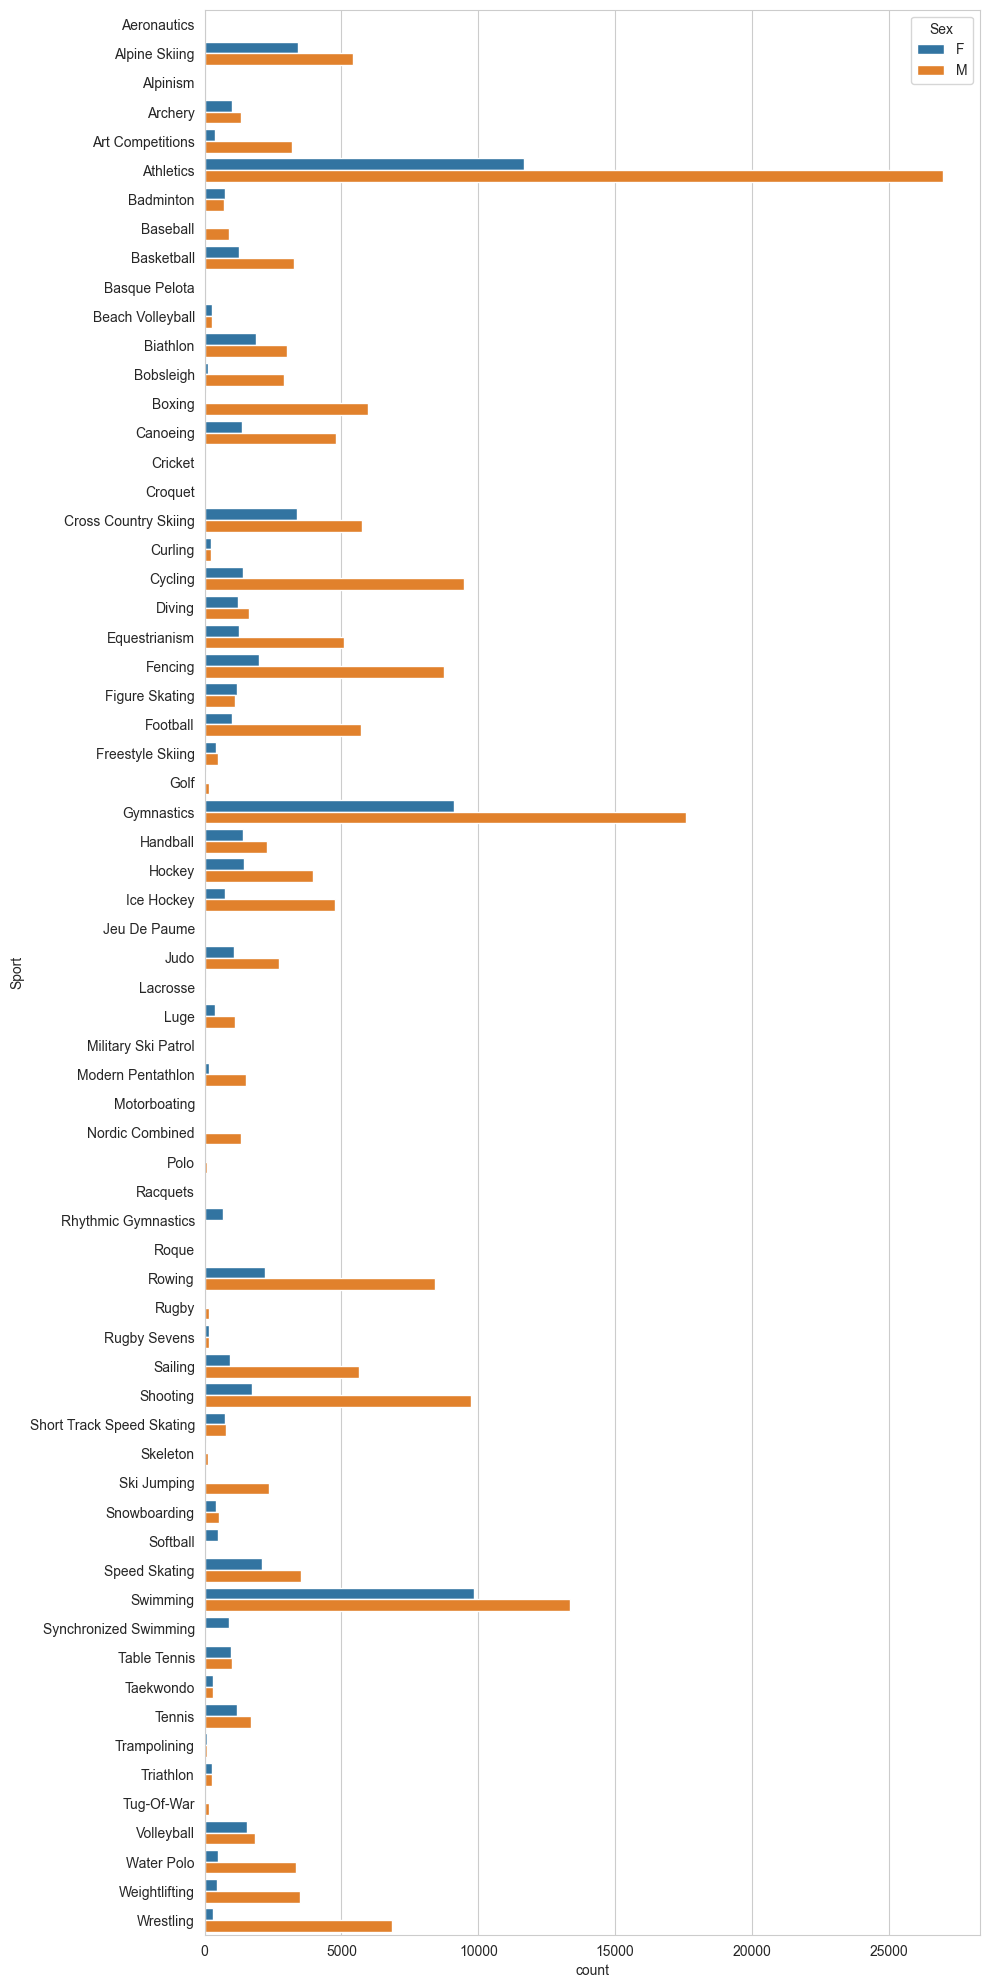

In [162]:
fig,ax = plt.subplots(figsize=(10,25))
h = sns.countplot(y='Sport',data=df, hue='Sex')



Interestingly enough, most of the sports have more male participants than female ones. Among the modern sports Baseball, Nordic Combined and Sky Jumping are male-only, while Softball, Synchronized Swimming and Rhythmic Gymnastics are female-only sports